In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def w_toni(a,k,a_0):
    return 1./6. - 1./6.*np.tanh(k*np.log(a/a_0))

In [3]:
def f(x, k, a_0):
    a = 1./3.*(1-1/(1+np.tanh(k*np.log(1/a_0))))
    b = -1./3./(1+np.tanh(k*np.log(1/a_0)))
    return a+b*np.tanh(k*np.log(x/a_0))
    # a = 1./3. - 1./3.*1./(1+np.tanh(k*np.log(1/a_0)))
    # b = - 1./3.*1./(1+np.tanh(k*np.log(1/a_0)))
    # return a+b*np.tanh(k*np.log(x/a_0))

def m_to_a0(m_eV):
    z = 1890*m_eV
    return 1/(1+z)

def m_to_k0():
    return 0.90885

In [5]:
m_to_a0(0.05)

0.010471204188481676

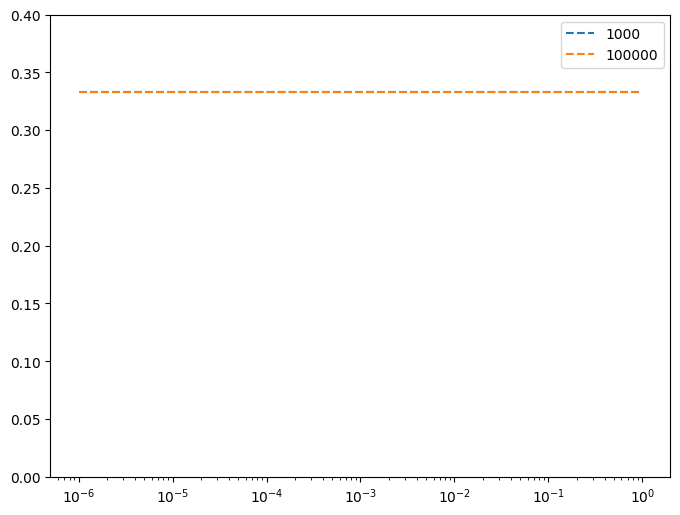

In [80]:
xx = np.logspace(-6,0,1000)

fig, ax = plt.subplots(figsize = (8,6))

masses = [0.3,0.8] #eV
a0s = [m_to_a0(m) for m in masses]
a0s = [1000,100000]
# for m in masses:
for a0 in a0s:
    # yy = f(xx,m_to_k0(),a0)
    # ax.plot(xx,yy,label = str(a0))
    yy = w_toni(xx,1,a0)
    ax.plot(xx,yy,label = str(a0), ls = '--')


ax.set_xscale('log')
ax.set_ylim([0,0.4])
ax.legend()

In [12]:
def int_w(a,k,a_0):
    c = 1./3.*(1-1/(1+np.tanh(k*np.log(1/a_0))))
    b = -1./3./(1+np.tanh(k*np.log(1/a_0)))
    def integral(a):
        return (1+c)*np.log(a)+b/k*np.log(np.cosh(k*np.log(a/a_0)))
    return np.exp(-3*(integral(a)-integral(1)))

def w_int_w(a,k,a_0,a_ini):
    c = 1./3.*(1-1/(1+np.tanh(k*np.log(1/a_0))))
    b = -1./3./(1+np.tanh(k*np.log(1/a_0)))
    def integral(a):
        return (1+c)*np.log(a)+b/k*np.log(np.cosh(k*np.log(a/a_0)))
    return (a/a_ini)**(+3*(1+f(a,k,a_0)))*np.exp(-3*(integral(a)-integral(a_ini)))

In [114]:
def int_w(a,k,a_0,a_ini):
    def integral(a):
        return 7./6.*np.log(a)-np.log(np.cosh(k*np.log(a/a_0)))/6./k
    intini = np.sqrt(a_0)/2**(1/(2*k))
    return np.exp(-3*(integral(a)))/intini
    # return (a/a_ini)**(+3*(1+f(a,k,a_0)))*np.exp(-3*(integral(a)-integral(a_ini)))

def w_int_w(a,k,a_0,a_ini):
    def integral(a):
        return 7./6.*np.log(a)-np.log(np.cosh(k*np.log(a/a_0)))/6./k
    # return a**(3*(1+w_toni(a,k,a_0)))/a_ini**4*np.exp(-3*(integral(a)-integral(a_ini)))
    intini = np.sqrt(a_0)/2**(1/(2*k))
    return a**(3*(1+w_toni(a,k,a_0)))*np.exp(-3*(integral(a)))/intini
    # return (a/a_ini)**(+3*(1+f(a,k,a_0)))*np.exp(-3*(integral(a)-integral(a_ini)))

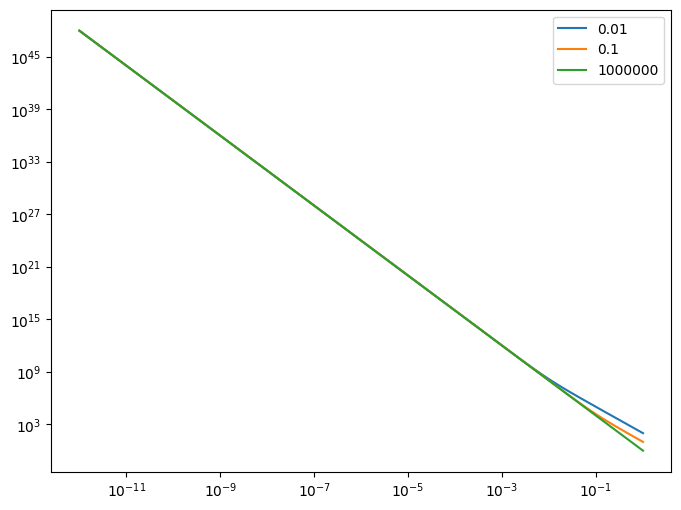

In [115]:
xx = np.logspace(-12,0,1000)

fig, ax = plt.subplots(figsize = (8,6))

# masses = [0.03,0.003] #eV
a0s = [m_to_a0(m) for m in masses]
a0s = [0.01,0.1,1000000]
# for m in masses:
for a0 in a0s:
    yy = int_w(xx,m_to_k0(),a0,1e-12)
    ax.plot(xx,yy,label = str(a0))

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

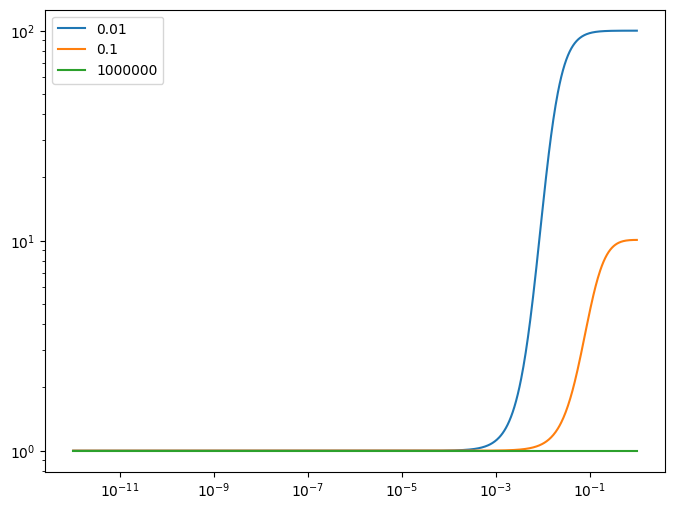

In [112]:
xx = np.logspace(-12,0,1000)

fig, ax = plt.subplots(figsize = (8,6))

# masses = [0.03,0.003] #eV
a0s = [m_to_a0(m) for m in masses]
a0s = [0.01,0.1,1000000]
# for m in masses:
for a0 in a0s:
    yy = w_int_w(xx,m_to_k0(),a0,1e-12)
    ax.plot(xx,yy,label = str(a0))

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()

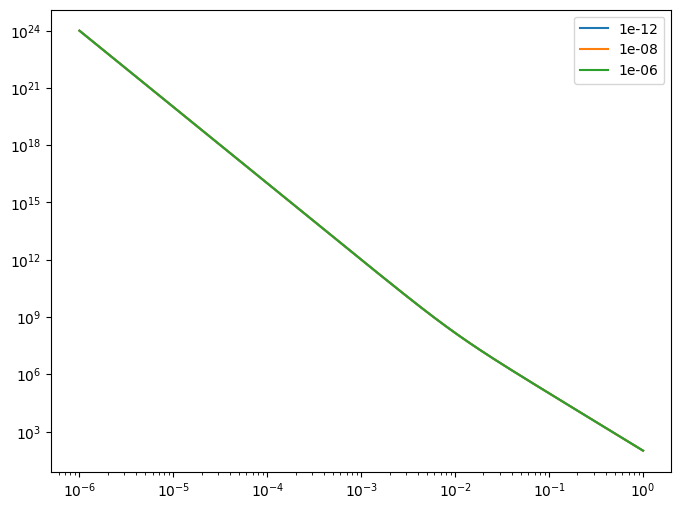

In [111]:
xx = np.logspace(-6,0,1000)

fig, ax = plt.subplots(figsize = (8,6))

# masses = [0.03,0.003] #eV
a0s = [m_to_a0(m) for m in masses]
a0s = [0.01,10000,1000000]
a0s = [1e-12,1e-8,1e-6]
# for m in masses:
# y0 = w_int_w(xx,m_to_k0(),0.01,1e-14)
for aini in a0s:
    yy = aini**-4*int_w(xx,m_to_k0(),0.01,aini)
    ax.plot(xx,yy,label = str(aini))

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()